In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
df=pd.read_csv('carprices.csv')
df.head()

Car Model  Mileage  Sell Price($)  Age(yrs)
0    BMW X5    69000          18000         6
1    BMW X5    35000          34000         3
2    BMW X5    57000          26100         5
3    BMW X5    22500          40000         2
4    BMW X5    46000          31500         4

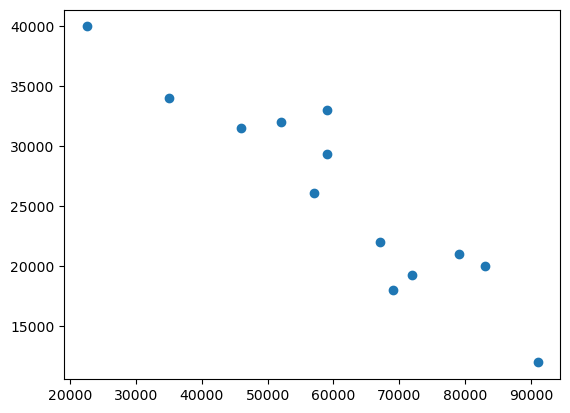

In [121]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

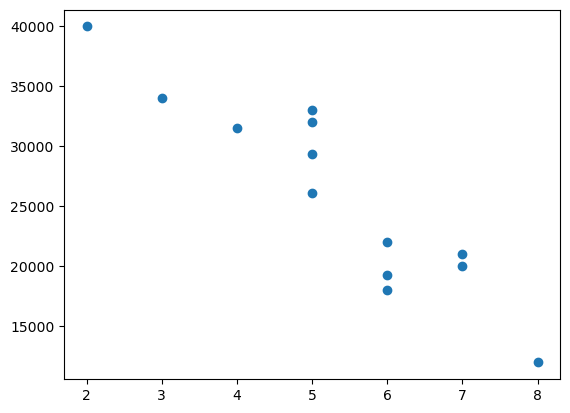

In [122]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

In [123]:
dummies=pd.get_dummies(df['Car Model'])
dummies

Audi A5  BMW X5  Mercedez Benz C class
0         0       1                      0
1         0       1                      0
2         0       1                      0
3         0       1                      0
4         0       1                      0
5         1       0                      0
6         1       0                      0
7         1       0                      0
8         1       0                      0
9         0       0                      1
10        0       0                      1
11        0       0                      1
12        0       0                      1

In [124]:
df_dum=pd.concat([df,dummies],axis=1)
df_dum.head()

Car Model  Mileage  Sell Price($)  Age(yrs)  Audi A5  BMW X5  \
0    BMW X5    69000          18000         6        0       1   
1    BMW X5    35000          34000         3        0       1   
2    BMW X5    57000          26100         5        0       1   
3    BMW X5    22500          40000         2        0       1   
4    BMW X5    46000          31500         4        0       1   

   Mercedez Benz C class  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [125]:
df_dum.drop(['Car Model'],axis=1,inplace=True)
df_dum.head()

Mileage  Sell Price($)  Age(yrs)  Audi A5  BMW X5  Mercedez Benz C class
0    69000          18000         6        0       1                      0
1    35000          34000         3        0       1                      0
2    57000          26100         5        0       1                      0
3    22500          40000         2        0       1                      0
4    46000          31500         4        0       1                      0

In [126]:
X=df_dum.drop(['Sell Price($)','Mercedez Benz C class'],axis=1)
X

Mileage  Age(yrs)  Audi A5  BMW X5
0     69000         6        0       1
1     35000         3        0       1
2     57000         5        0       1
3     22500         2        0       1
4     46000         4        0       1
5     59000         5        1       0
6     52000         5        1       0
7     72000         6        1       0
8     91000         8        1       0
9     67000         6        0       0
10    83000         7        0       0
11    79000         7        0       0
12    59000         5        0       0

In [127]:
y=df_dum['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [129]:
X_train

Mileage  Age(yrs)  Audi A5  BMW X5
6     52000         5        1       0
8     91000         8        1       0
2     57000         5        0       1
12    59000         5        0       0
5     59000         5        1       0
10    83000         7        0       0
1     35000         3        0       1
0     69000         6        0       1
4     46000         4        0       1
9     67000         6        0       0

In [130]:
model=LinearRegression()


In [131]:
model.fit(X_train,y_train)

LinearRegression()

In [132]:
model.predict(X_test)

array([42227.72902773, 24434.07043407, 19085.43933544])

In [133]:
y_test

3     40000
7     19300
11    21000
Name: Sell Price($), dtype: int64

In [134]:
model.score(X_test,y_test)

0.8675370464375718

In [135]:
model.predict([[45000,4,0,0]])

C:\Users\hp\anaconda3\envs\virtual_environment_name\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36871.03077103])

In [111]:
model.predict([[86000,7,0,1]])


C:\Users\hp\anaconda3\envs\virtual_environment_name\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12537.34643735])

In [ ]:
model.predict([[]])